In [13]:
import time
import datetime
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [19]:
PATH = r'C:\Users\44738\Desktop\Desktop Files\Dissertation\sp_500.csv'
all_tickers = pd.read_csv(PATH)
start_date = '2016-07-01'
end_date = '2021-07-01'

In [15]:
def value_at_risk(returns, confidence_level=.05):
    
#     print('VaR:', returns.quantile(confidence_level, interpolation='higher'))
    # Calculating VaR
    return float(returns.quantile(confidence_level, interpolation='higher'))

In [16]:
def expected_shortfall(returns, confidence_level=.05):
    
    # Calculating VaR
    var = value_at_risk(returns, confidence_level)
    # ES is the average of the worst losses (under var)
    
    return float(returns[returns.lt(var)].mean())

In [17]:
tickers = ["^GSPC"]

In [18]:
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
sp500 = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in tickers:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    sp500 = pd.concat([sp500, df], axis=1)

In [20]:
# Dont rerun
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
balanced = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in all_tickers['stocks_all']:
    try:
        query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
        df = pd.read_csv(query_string)
        df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df.rename(columns={'Adj Close': ticker}, inplace=True)
        balanced = pd.concat([balanced, df], axis=1)
    except:
        print('No data for:', ticker)
balanced = balanced.iloc[1:]

No data for: PKI
No data for: KMX
No data for: CHD
No data for: HOLX
No data for: BR
No data for: RF
No data for: KEY
No data for: AMCR
No data for: DGX
No data for: CZR
No data for: DPZ
No data for: TER
No data for: IR
No data for: HPE
No data for: POOL
No data for: TYL
No data for: CCL
No data for: ALLE
No data for: DRI
No data for: GWW
No data for: PEAK
No data for: TTWO
No data for: HES
No data for: WDC
No data for: AKAM
No data for: DRE
No data for: CFG
No data for: CINF
No data for: CMS
No data for: MKTX
No data for: AVY
No data for: RCL
No data for: BBWI
No data for: TFX
No data for: NTAP
No data for: CE
No data for: NVR
No data for: MTB
No data for: HAL
No data for: GPC
No data for: VTRS
No data for: J
No data for: ABC
No data for: STX
No data for: IEX
No data for: BIO
No data for: PFG
No data for: DVN
No data for: RJF
No data for: MGM
No data for: K
No data for: TXT
No data for: BXP
No data for: ABMD
No data for: BKR
No data for: CAG
No data for: AES
No data for: MAS
No data f

In [24]:
balanced

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,NVDA,BRK-B,JPM,...,QRVO,STE,EXPD,EXPE,ANET,MPWR,ULTA,ESS,OXY,VTR
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,22.151365,47.050705,728.099976,114.199997,704.890015,694.950012,42.796001,11.646004,142.229996,51.891254,...,51.820000,63.793316,46.178200,101.896332,63.450001,63.177402,244.720001,198.702652,60.992661,57.261791
2016-07-06,22.277292,47.243805,737.609985,116.699997,708.969971,697.770020,42.888000,11.719793,142.509995,52.448944,...,52.570000,64.056816,45.878407,102.156044,64.629997,63.569206,247.770004,197.714294,61.179165,56.741985
2016-07-07,22.372902,47.243805,736.570007,115.849998,707.260010,695.359985,43.188000,12.024776,141.910004,52.788795,...,54.369999,64.169769,46.150089,103.473892,66.000000,64.438858,247.289993,196.597076,61.179165,55.973942
2016-07-08,22.545471,48.089737,745.809998,117.239998,717.780029,705.630005,43.355999,12.506849,143.649994,53.878021,...,56.020000,65.082573,46.768429,105.263046,67.730003,65.776756,250.820007,198.805756,61.730545,56.346317
2016-07-11,22.615431,48.356396,753.780029,117.870003,727.200012,715.090027,44.956001,12.794621,143.929993,54.261436,...,57.730000,65.016685,46.665371,107.042603,69.800003,66.713264,252.289993,198.805756,61.787292,56.788540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,132.910873,264.513611,3401.459961,341.369995,2450.169922,2539.899902,671.869995,190.276443,278.380005,153.167358,...,183.350006,206.390579,125.750000,170.990005,362.220001,365.094086,348.859985,305.248383,32.910000,57.856583
2021-06-28,134.578369,268.206543,3443.889893,355.640015,2450.719971,2536.389893,688.719971,199.814774,276.609985,153.445755,...,187.330002,206.819717,125.769997,163.550003,362.820007,373.880005,343.119995,303.559998,31.240000,57.558910
2021-06-29,136.126053,270.881409,3448.139893,351.890015,2445.449951,2520.370117,680.760010,200.232193,276.209991,153.256851,...,195.660004,206.051254,126.120003,159.899994,363.760010,377.399994,343.769989,302.130005,31.299999,57.420002


In [25]:
# Dont rerun
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
balanced2 = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in all_tickers['stocks_all'].iloc[358:]:
    try:
        query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
        df = pd.read_csv(query_string)
        df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df.rename(columns={'Adj Close': ticker}, inplace=True)
        balanced2 = pd.concat([balanced2, df], axis=1)
    except:
        print('No data for:', ticker)
balanced2 = balanced2.iloc[1:]

In [26]:
balanced2

,PKI,KMX,CHD,HOLX,BR,RF,KEY,AMCR,DGX,CZR,...,IPGP,GPS,COG,RL,PRGO,UNM,FOX,NOV,DISCA,UAA
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,51.119537,47.759998,48.024590,34.439999,60.098930,6.795034,8.901671,8.937539,73.316154,14.970000,...,78.180000,18.282925,23.497690,80.568161,84.520134,25.386503,NaN,31.274181,24.770000,39.200001
2016-07-06,51.512390,50.450001,47.081192,34.700001,60.254982,6.939067,9.001690,8.937539,73.424683,14.970000,...,77.839996,18.729900,23.933002,82.060852,86.333473,25.544952,NaN,30.612497,25.100000,39.849998
2016-07-07,51.649891,50.439999,46.779137,35.500000,60.300880,6.989904,9.118379,8.937539,73.460869,14.860000,...,78.010002,18.592361,23.544001,83.517120,86.556664,25.419861,NaN,30.836302,25.410000,40.520000
2016-07-08,52.985577,52.669998,47.076550,35.930000,61.154583,7.150882,9.243402,8.937539,74.365211,15.090000,...,79.699997,19.512100,23.562525,84.873276,87.161118,26.020329,NaN,31.712061,25.620001,40.430000
2016-07-11,52.995399,53.320000,47.257793,35.610001,61.494232,7.261025,9.351755,8.937539,74.898781,15.220000,...,79.889999,19.684013,23.710714,87.385338,87.105293,26.103722,NaN,31.322832,25.250000,40.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,152.359787,127.400002,83.977272,65.889999,160.690002,20.426031,21.071722,11.610000,129.027161,102.430000,...,210.979996,33.867882,16.707045,121.180000,46.604099,29.012575,36.135525,15.660000,30.860001,21.690001
2021-06-28,154.778687,129.009995,84.804771,67.470001,160.809998,20.168226,20.486948,11.550000,131.047729,100.540001,...,212.720001,32.542660,16.210402,117.199997,46.057339,28.102531,35.946854,14.720000,30.570000,20.990000
2021-06-29,155.768219,130.649994,84.685143,68.849998,162.050003,19.890591,20.338276,11.460000,132.361572,100.879997,...,213.770004,32.462948,16.170671,116.910004,45.888336,27.875021,34.794968,14.800000,30.340000,21.070000


In [11]:
tickers = ['BF-B', 'BRK-B']

In [12]:
# Dont rerun
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
balanced3 = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in tickers:
    try:
        query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
        df = pd.read_csv(query_string)
        df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df.rename(columns={'Adj Close': ticker}, inplace=True)
        balanced3 = pd.concat([balanced2, df], axis=1)
    except:
        print('No data for:', ticker)
balanced3 = balanced3.iloc[1:]

In [27]:
balanced = pd.concat([balanced, balanced2], axis=1)

In [28]:
balanced

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,TSLA,NVDA,BRK-B,JPM,...,IPGP,GPS,COG,RL,PRGO,UNM,FOX,NOV,DISCA,UAA
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,22.151365,47.050705,728.099976,114.199997,704.890015,694.950012,42.796001,11.646004,142.229996,51.891254,...,78.180000,18.282925,23.497690,80.568161,84.520134,25.386503,NaN,31.274181,24.770000,39.200001
2016-07-06,22.277292,47.243805,737.609985,116.699997,708.969971,697.770020,42.888000,11.719793,142.509995,52.448944,...,77.839996,18.729900,23.933002,82.060852,86.333473,25.544952,NaN,30.612497,25.100000,39.849998
2016-07-07,22.372902,47.243805,736.570007,115.849998,707.260010,695.359985,43.188000,12.024776,141.910004,52.788795,...,78.010002,18.592361,23.544001,83.517120,86.556664,25.419861,NaN,30.836302,25.410000,40.520000
2016-07-08,22.545471,48.089737,745.809998,117.239998,717.780029,705.630005,43.355999,12.506849,143.649994,53.878021,...,79.699997,19.512100,23.562525,84.873276,87.161118,26.020329,NaN,31.712061,25.620001,40.430000
2016-07-11,22.615431,48.356396,753.780029,117.870003,727.200012,715.090027,44.956001,12.794621,143.929993,54.261436,...,79.889999,19.684013,23.710714,87.385338,87.105293,26.103722,NaN,31.322832,25.250000,40.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,132.910873,264.513611,3401.459961,341.369995,2450.169922,2539.899902,671.869995,190.276443,278.380005,153.167358,...,210.979996,33.867882,16.707045,121.180000,46.604099,29.012575,36.135525,15.660000,30.860001,21.690001
2021-06-28,134.578369,268.206543,3443.889893,355.640015,2450.719971,2536.389893,688.719971,199.814774,276.609985,153.445755,...,212.720001,32.542660,16.210402,117.199997,46.057339,28.102531,35.946854,14.720000,30.570000,20.990000
2021-06-29,136.126053,270.881409,3448.139893,351.890015,2445.449951,2520.370117,680.760010,200.232193,276.209991,153.256851,...,213.770004,32.462948,16.170671,116.910004,45.888336,27.875021,34.794968,14.800000,30.340000,21.070000


In [14]:
balanced = balanced.loc[:,~balanced.columns.duplicated()]

In [35]:
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
screened = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in all_tickers['stocks']:
    try:
        query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
        df = pd.read_csv(query_string)
        df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df.rename(columns={'Adj Close': ticker}, inplace=True)
        screened = pd.concat([screened, df], axis=1)
    except:
        print('No data for:', ticker)
screened = screened.iloc[1:]

No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: nan
No data for: n

In [37]:
screened = screened.loc[:,'ANTM':'ROST']

In [38]:
screened

,ANTM,CTAS,DRE,MTD,EFX,ZBRA,HBI,A,IDXX,JCI,...,TFX,IP,HAS,AJG,PSA,PKG,POOL,DLTR,RE,ROST
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-05,122.382957,93.520042,22.375465,363.190002,121.616135,47.610001,20.874397,41.909252,93.379997,34.029594,...,173.949860,33.575806,71.389709,42.521107,216.531601,56.713455,89.616211,94.980003,160.368179,53.892075
2016-07-06,123.580208,93.332062,22.451202,366.609985,122.691727,46.930000,21.316933,42.598957,93.570000,34.005043,...,173.317139,33.736607,71.979332,42.807270,215.189407,59.348083,89.956757,94.860001,161.358994,54.303246
2016-07-07,121.073463,92.824516,22.207169,366.750000,123.040848,46.990002,21.300238,42.551060,93.860001,34.144138,...,174.378159,33.688370,72.066071,42.923519,211.563065,59.547390,90.032440,94.629997,161.448273,54.083309
2016-07-08,123.608284,93.642227,22.585844,373.029999,124.767464,47.880001,21.934814,43.566456,94.959999,34.995079,...,177.259491,34.371784,73.453445,43.549488,214.530823,60.786701,91.451485,95.080002,162.207016,55.641941
2016-07-11,123.056435,92.175995,22.829878,375.320007,124.965569,48.230000,21.926464,43.489819,94.599998,35.150536,...,178.096649,34.596909,74.138474,43.799873,213.880569,60.440041,91.460938,94.870003,161.742828,55.517639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,380.820007,377.338928,47.858410,1352.020020,238.654633,510.649994,18.767031,147.086670,620.640015,67.089996,...,411.822449,60.160492,92.907028,141.428436,304.750000,135.259995,455.016907,98.349998,254.784241,123.268890
2021-06-28,380.899994,378.665649,47.838512,1381.670044,237.116791,527.130005,18.439526,147.735809,631.900024,67.559998,...,406.007935,60.190235,92.976555,140.212479,304.500000,135.589996,455.785675,99.379997,250.120895,121.483253
2021-06-29,381.559998,381.588531,47.599716,1397.650024,238.974182,536.059998,18.320433,148.614655,637.080017,68.370003,...,408.245819,60.170406,93.363914,140.730759,303.480011,135.070007,464.271637,99.480003,251.562653,121.862328


In [19]:
test = screened.copy()

In [42]:
screened_return = screened.pct_change()[1:]
weights = [1/len(screened.columns)] * len(screened.columns)
screened_weighted = (weights * screened_return)
screened_portfolio = pd.DataFrame(screened_weighted.sum(axis=1)).rename(columns={0:'Nasdaq 100 Screened'})
cumu_screened = (screened_portfolio + 1).cumprod()
cumu_screened = cumu_screened - 1
cumu_screened = cumu_screened * 100

In [22]:
test_b = balanced.copy()

In [31]:
balanced_return = balanced.pct_change()[1:]
weights = [1/len(balanced.columns)] * len(balanced.columns)
balanced_weighted = (weights * balanced_return)
balanced_portfolio = pd.DataFrame(balanced_weighted.sum(axis=1)).rename(columns={0:'Nasdaq 100 Balanced'})
cumu_balanced = (balanced_portfolio + 1).cumprod()
cumu_balanced = cumu_balanced - 1
cumu_balanced = cumu_balanced * 100

In [29]:
sp500_return = sp500.pct_change()[1:]
weights = [1/len(sp500.columns)] * len(sp500.columns)
sp500_weighted = (weights * sp500_return)
sp500_portfolio = pd.DataFrame(sp500_weighted.sum(axis=1)).rename(columns={0:'sp500 100'})
cumu_sp500 = (sp500_portfolio + 1).cumprod()
cumu_sp500 = cumu_sp500 - 1
cumu_sp500 = cumu_sp500 * 100

In [34]:
sp500_portfolio.to_csv('sp500_balanced_returns.csv')

In [41]:
screened_portfolio.to_csv("sp500_screened_returns.csv")

In [11]:
# skew(sp500_return, bias=False)
kurtosis(sp500_return, bias=False)

array([21.38799764])

In [43]:
print(cumu_sp500.iloc[-1])
print(cumu_balanced.iloc[-1])
print(cumu_screened.iloc[-1])

sp500 100    105.42286
Name: 2021-07-01 00:00:00, dtype: float64
Nasdaq 100 Balanced    157.518591
Name: 2021-07-01 00:00:00, dtype: float64
Nasdaq 100 Screened    168.252549
Name: 2021-07-01 00:00:00, dtype: float64


In [89]:
expected_shortfall(balanced_portfolio)

Nasdaq 100 Balanced   -0.032151
dtype: float64

In [28]:
export_csv = pd.concat([sp500_portfolio, balanced_portfolio, screened_portfolio], axis=1)
export_csv.to_csv('sp500_returns_dataframe.csv')

In [ ]:
""" 
SP500
VaR: -1.71%
ES: -3.06%

Balanced
VaR: -1.73%
ES: -3.22%

Screened
VaR: -1.65%
ES: -3.19%

"""

C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

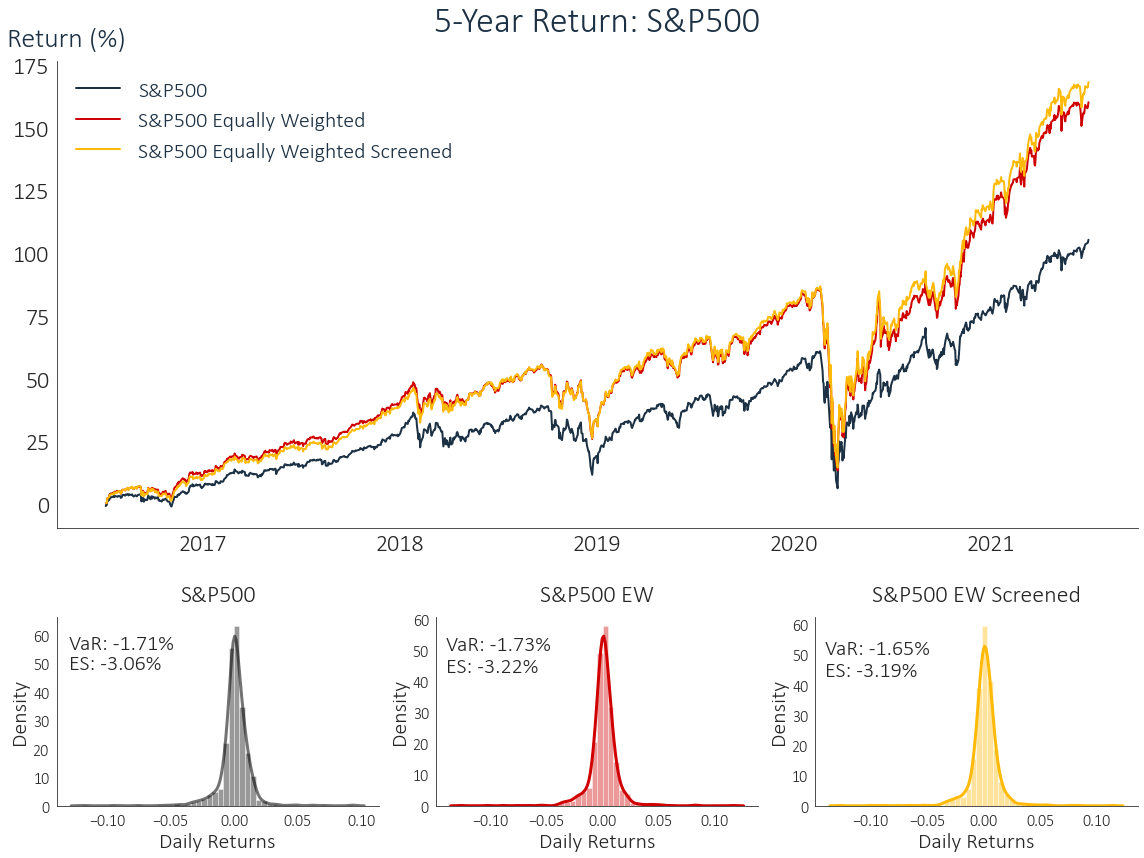

In [37]:
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot2grid((6, 3), (0,0), rowspan=4, colspan=3)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.xticks(fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2 = plt.subplot2grid((6, 3), (4,0), rowspan=2, colspan=1)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2.set_title("S&P500", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)
ax3 = plt.subplot2grid((6, 3), (4,1), rowspan=2, colspan=1)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.set_title("S&P500 EW", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)
ax4 = plt.subplot2grid((6, 3), (4,2), rowspan=2, colspan=1)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.set_title("S&P500 EW Screened", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)

ax1.set_ylabel('Return (%)', fontsize=28, fontname='Calibri', fontweight='light', labelpad=6, color='#1C3144', rotation='horizontal', horizontalalignment='left', y=1.02)

ax1.set_title(label='5-Year Return: S&P500', fontsize=36, color='#1C3144', fontname='Calibri', weight='ultralight', y=1.05)
ax1.plot(cumu_sp500, color='#1C3144', lw=2, label='S&P500')
ax1.plot(cumu_balanced, color='#D00000', lw=2, label='S&P500 Equally Weighted')
ax1.plot(cumu_screened, color='#FFBA08', lw=2, label='S&P500 Equally Weighted Screened')
L = ax1.legend(frameon=False, loc='upper left', fontsize=22)
plt.setp(L.texts, family='Calibri', weight='light', color='#1C3144')

sns.distplot(sp500_portfolio, color=(0,0,0,0.55), bins=50, ax=ax2, kde_kws=dict(linewidth=3))
sns.distplot(balanced_portfolio, color='#D00000', bins=50, ax=ax3, kde_kws=dict(linewidth=3))
sns.distplot(screened_portfolio, color='#FFBA08', bins=50, ax=ax4, kde_kws=dict(linewidth=3))

ax2.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2.text(x=-0.13, y=55, s='VaR: -1.71%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax2.text(x=-0.13, y=48, s='ES: -3.06%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax3.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.text(x=-0.14, y=50, s='VaR: -1.73%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax3.text(x=-0.14, y=43, s='ES: -3.22%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax4.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.text(x=-0.14, y=50, s='VaR: -1.65%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax4.text(x=-0.14, y=43, s='ES: -3.19%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax2.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))


plt.tight_layout(h_pad=3)

plt.savefig('SP500_Graph.jpeg', format='jpeg', dpi=300)


In [109]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    print(sigma)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.01 #1% risk free rate

In [86]:
returns_csv = pd.read_csv('sp500_returns_dataframe.csv')

In [87]:
# returns_csv.drop(columns=['Date'], inplace=True)
returns_csv

,Date,sp500 100,Nasdaq 100 Balanced,Nasdaq 100 Screened
0,05/07/2016,-0.006847,NaN,NaN
1,06/07/2016,0.005353,0.005078,0.005329
2,07/07/2016,-0.000872,0.000839,0.000114
3,08/07/2016,0.015253,0.017913,0.018578
4,11/07/2016,0.003409,0.004522,0.004097
...,...,...,...,...
1253,25/06/2021,0.003331,0.007020,0.006769
1254,28/06/2021,0.002315,-0.004153,-0.002028
1255,29/06/2021,0.000277,-0.000920,-0.000256
1256,30/06/2021,0.001328,0.002446,0.000951


In [110]:
sharpes = []
for col in returns_csv:
    sharpe = sharpe_ratio(returns_csv[col], N, rf)
    sharpes.append(sharpe)

0.19156077026388588
0.20693698311079808
0.20606229146994265


In [57]:
sharpes

[0.8061733990971769, 0.9936426501081629, 1.0270747563504623]

In [60]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

In [61]:
sortinos = []
for col in returns_csv:
    sortino = sortino_ratio(returns_csv[col], N, rf)
    sortinos.append(sortino)

In [62]:
sortinos

[0.8833526788445469, 1.0800263707995021, 1.1285872571041924]

In [69]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

In [44]:
def omega(return_series):
    omega = -return_series.loc[return_series > 0].sum() / return_series.loc[return_series < 0].sum()
    return omega

In [52]:
# !pip install pyfolio
import pyfolio as pf

In [88]:
returns_csv['Date'] = pd.to_datetime(returns_csv['Date'])
returns_csv.set_index('Date', inplace=True)

In [89]:
returns_csv

,sp500 100,Nasdaq 100 Balanced,Nasdaq 100 Screened
Date,,,
2016-05-07,-0.006847,NaN,NaN
2016-06-07,0.005353,0.005078,0.005329
2016-07-07,-0.000872,0.000839,0.000114
2016-08-07,0.015253,0.017913,0.018578
2016-11-07,0.003409,0.004522,0.004097
...,...,...,...
2021-06-25,0.003331,0.007020,0.006769
2021-06-28,0.002315,-0.004153,-0.002028
2021-06-29,0.000277,-0.000920,-0.000256


In [90]:
sp500_csv = pd.Series(returns_csv['sp500 100'])
sp500_csv

Date
2016-05-07   -0.006847
2016-06-07    0.005353
2016-07-07   -0.000872
2016-08-07    0.015253
2016-11-07    0.003409
                ...   
2021-06-25    0.003331
2021-06-28    0.002315
2021-06-29    0.000277
2021-06-30    0.001328
2021-01-07    0.005222
Name: sp500 100, Length: 1258, dtype: float64

Start date,2016-05-07
End date,2021-01-07
Total months,59
,Backtest
Annual return,21.9%
Cumulative returns,168.3%
Annual volatility,20.5%
Sharpe ratio,1.07
Calmar ratio,0.57
Stability,0.88
Max drawdown,-38.6%


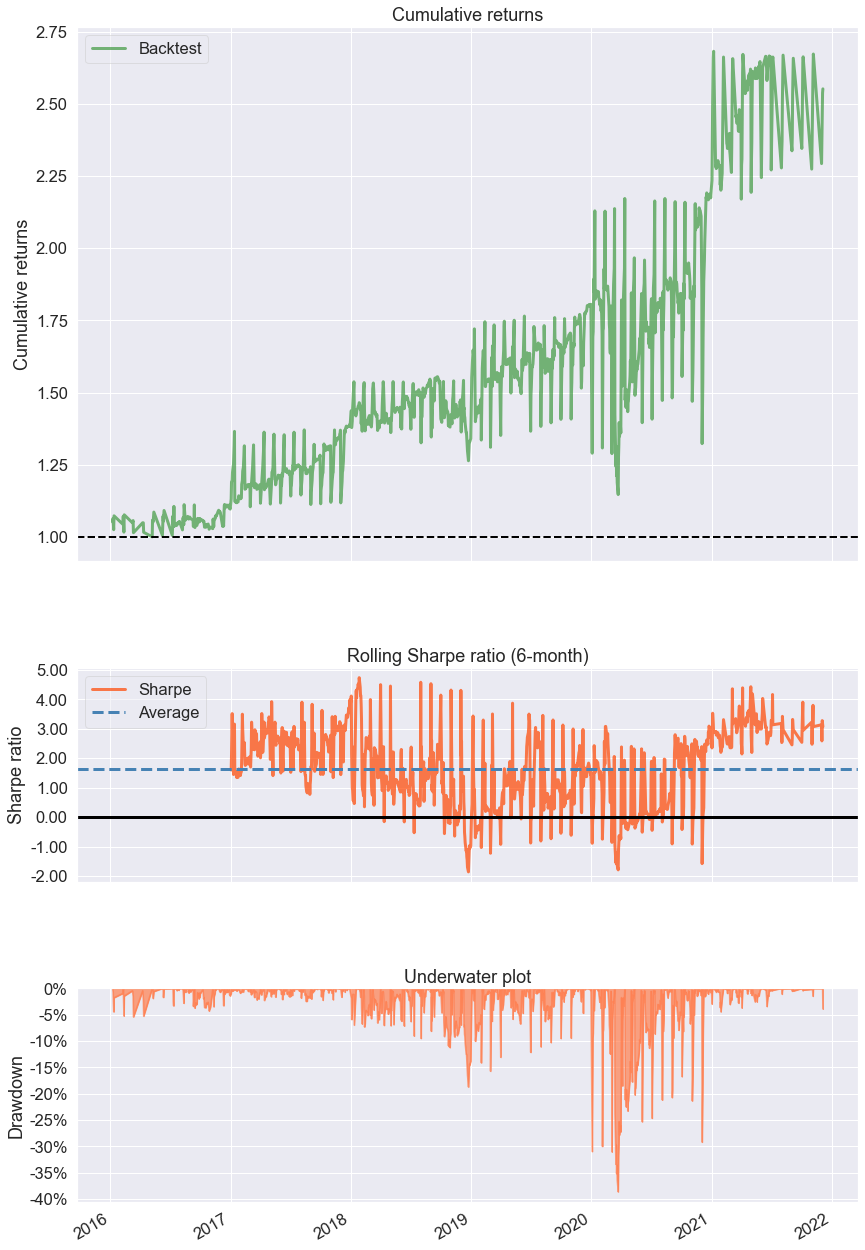

In [93]:
pf.create_simple_tear_sheet(returns_csv['Nasdaq 100 Screened'])

In [47]:
omegas = []
for col in returns_csv:
    omegam = omega(returns_csv[col])
    omegas.append(omega)

TypeError: '>' not supported between instances of 'str' and 'int'

In [74]:
dds = []
for col in returns_csv:
    dd = max_drawdown(returns_csv[col])
    dds.append(dd)

In [73]:
dds

[-0.33924960006097205, -0.3900637330909167, -0.3864815399423005]

In [86]:
calmars = [0, 0, 0]
calmars[0] = returns_csv['sp500 100'].mean()*255/abs(-0.33924960006097205)
calmars[1] = returns_csv['Nasdaq 100 Balanced'].mean()*255/abs(-0.3900637330909167)
calmars[2] = returns_csv['Nasdaq 100 Screened'].mean()*255/abs(-0.3864815399423005)
calmars

[0.48469090978370405, 0.552785081030192, 0.5734850307147894]

In [93]:
var = [0, 0, 0]
var[0] = value_at_risk(sp500_portfolio)
var[1] = value_at_risk(balanced_portfolio)
var[2] = value_at_risk(screened_portfolio)
var

[-0.017053851930321717, -0.017297431997934914, -0.016526343897632512]

In [95]:
es = [0, 0, 0]
es[0] = expected_shortfall(sp500_portfolio)
es[1] = expected_shortfall(balanced_portfolio)
es[2] = expected_shortfall(screened_portfolio)
es

[-0.03060338594564432, -0.03215092662804609, -0.0318794714978585]

In [98]:
btstats = pd.DataFrame()
btstats['Sortino'] = sortinos
btstats['Sharpe'] = sharpes
btstats['Max DD'] = dds
btstats['Calmar'] = calmars
btstats['VaR'] = var
btstats['ES'] = es

btstats['temp'] = ['S&P500', 'S&P EW', 'S&P EW Screened']
btstats.set_index('temp', inplace=True)

In [100]:
btstats

,Sortino,Sharpe,Max DD,Calmar,VaR,ES
temp,,,,,,
S&P500,0.883353,0.806173,-0.339250,0.484691,-0.017054,-0.030603
S&P EW,1.080026,0.993643,-0.390064,0.552785,-0.017297,-0.032151
S&P EW Screened,1.128587,1.027075,-0.386482,0.573485,-0.016526,-0.031879


In [104]:
cumu_screened.tail()

,Nasdaq 100 Screened
Date,
2021-06-25,166.639047
2021-06-28,166.098356
2021-06-29,166.030242
2021-06-30,166.283147
2021-07-01,168.252548


In [105]:
cumu_balanced.tail()

,Nasdaq 100 Balanced
Date,
2021-06-25,159.133226
2021-06-28,158.057088
2021-06-29,157.819707
2021-06-30,158.450359
2021-07-01,160.189693


In [106]:
from scipy import stats
# Y and Z are numpy arrays or lists of variables 
stats.pearsonr(cumu_balanced['Nasdaq 100 Balanced'], cumu_screened['Nasdaq 100 Screened'])

(0.9994893964768615, 0.0)